## value iteration
Value iteration is used to solve Bellman Optimality Equation.

Bellman Optimality Equation：
$$ v^{*} = r_{\pi}^{*} + \gamma P_{\pi}v^{*} $$

Accordding to `contracting theorem`, can be solved by a iterative way：
$$ v_{k+1} = f(v_k) = \max_{\pi}(r_{\pi} + \gamma P_{\pi}v_{k}) $$

Two steps：

### First: policy update

random $v_{k}$ value，and then solve a optimality problem：
$$
\pi_{k+1} = \argmax_{\pi}(r_{\pi} + \gamma P_{\pi}v_{k})
$$

$$
\pi_{k+1}(s) = \argmax_{\pi} \sum_{a} \pi(a|s) \underbrace{(\sum_{r}p(r|s,a)r + \gamma \sum_{s^{\prime}}p(s^{\prime}|s,a)v_{k}(s^{\prime}))}_{q_\pi(a, s)}, s \in \mathbb{S}
$$

For each state and each action, we can obtain the rows * columns actions values, we choosed the best action value(s) as the $\pi_{k+1}$。

### Second, value update

We choose the best action value as the `state value`
$$
v_{k+1} = r_{{\pi}_{k+1}} + \gamma P_{{\pi}_{k+1}}v_{k}
$$

$$
v_{k+1}(s) =  \sum_{a} \pi_{k+1}(a|s) \underbrace{(\sum_{r}p(r|s,a)r + \gamma \sum_{s^{\prime}}p(s^{\prime}|s,a)v_{k}(s^{\prime}))}_{q_\pi(a, s)}, s \in \mathbb{S}
$$

### Third, remark

The value iteration algorithms were applied to model-known environment.

<img src = 'value_iteration.png' alt = 'value_iteration_algorithms' style="width: 700px; height: 350px;" />

In [1]:
import numpy as np
import random
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))
from GridWorld import GridWorld

In [2]:
# discount rate, range from 0 to 1, the larger the value, the smaller the discount
gamma = 0.9 
rows = 10
cols = 10
forbiddenAreaNums = 10
# load the grid world
grid_world = GridWorld(rows, cols, forbiddenAreaNums=forbiddenAreaNums)
grid_world.show()

⬜️⬜️⬜️🚫⬜️⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️🚫⬜️⬜️⬜️⬜️⬜️⬜️
⬜️🚫⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️✅⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️🚫⬜️🚫⬜️⬜️🚫
⬜️⬜️⬜️⬜️⬜️⬜️🚫⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️⬜️🚫⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️⬜️🚫⬜️🚫⬜️
⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️


In [3]:
# state value: initialize all states to 0
state_values = np.zeros(rows*cols) 
# action value: initialize all action values to 0
qtable = np.zeros((rows*cols, 5))
print(f'Initial state value:')
print(state_values)
policy = np.zeros((rows*cols, 5)).tolist()
print(f'Initial policy:')
grid_world.show_policy_matirx(policy)

Initial state value:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Initial policy:
Now policy:
⬆️⬆️⬆️⏫️⬆️⬆️⬆️⬆️⬆️⬆️
⬆️⬆️⬆️⏫️⬆️⬆️⬆️⬆️⬆️⬆️
⬆️⏫️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️
⬆️⬆️⬆️⬆️⬆️✅⬆️⬆️⬆️⬆️
⬆️⬆️⬆️⬆️⏫️⬆️⏫️⬆️⬆️⏫️
⬆️⬆️⬆️⬆️⬆️⬆️⏫️⬆️⬆️⬆️
⬆️⬆️⬆️⬆️⬆️⬆️⏫️⬆️⬆️⬆️
⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️
⬆️⬆️⬆️⬆️⬆️⬆️⏫️⬆️⏫️⬆️
⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️


Euclidean Distance: 100.0
Euclidean Distance: 63.79604258373611
Euclidean Distance: 30.50756057137231
Euclidean Distance: 25.834630868242648
Euclidean Distance: 24.677554768589356
Euclidean Distance: 23.027537412460735
Euclidean Distance: 19.6983406243932
Euclidean Distance: 16.52051497872048
Euclidean Distance: 13.610385057313215
Euclidean Distance: 11.024411896423702
Euclidean Distance: 8.929773636103192
Euclidean Distance: 7.233116645243589
Euclidean Distance: 5.8588244826473
Euclidean Distance: 4.7456478309443115
Euclidean Distance: 3.8439747430648965
Euclidean Distance: 3.1136195418825685
Euclidean Distance: 2.5220318289248875
Euclidean Distance: 2.0428457814291483
Euclidean Distance: 1.654705082957613
Euclidean Distance: 1.3403111171956645
Euclidean Distance: 1.0856520049284917
Euclidean Distance: 0.8793781239920769
Euclidean Distance: 0.7122962804335867
Euclidean Distance: 0.5769599871512038
Euclidean Distance: 0.4673375895924728
Euclidean Distance: 0.37854344756990277
Euclidean

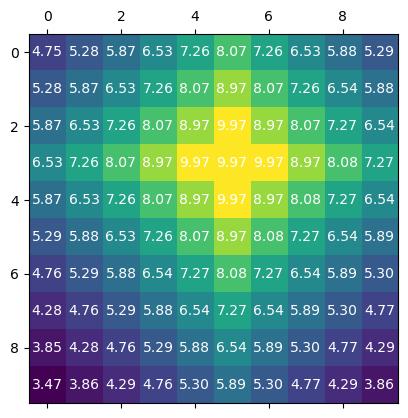

final policy: 
Now policy:
➡️➡️⬇️⏩️➡️⬇️⬇️⬇️⬇️⬇️
➡️➡️⬇️⏩️➡️⬇️⬇️⬇️⬇️⬇️
⬇️⏩️➡️➡️➡️⬇️⬇️⬇️⬇️⬇️
➡️➡️➡️➡️➡️✅⬅️⬅️⬅️⬅️
⬆️⬆️⬆️⬆️⏫️⬆️⏫️⬆️⬆️⏫️
⬆️⬆️⬆️⬆️➡️⬆️⏪⬆️⬆️⬅️
⬆️⬆️⬆️⬆️⬆️⬆️⏪⬆️⬆️⬆️
⬆️⬆️⬆️⬆️⬆️⬆️⬅️⬆️⬆️⬆️
⬆️⬆️⬆️⬆️⬆️⬆️⏫️⬆️⏫️⬆️
⬆️⬆️⬆️⬆️⬆️⬆️⬅️⬆️⬅️⬆️


In [4]:


## set the maximum number of iterations
cut = 0
cut_max = 1000
## set the threshold, if the difference between the value of the two iterations is less than the threshold, the iteration ends
threshold = 1e-3

pre_value = state_values.copy() + 1
while np.sum((pre_value - state_values)**2) > threshold and cut < cut_max:
    print("Euclidean Distance:",np.sum((pre_value-state_values)**2))
    pre_value = state_values.copy()

    # iterate through all states
    for i in range(rows * cols):
        # iterate through all actions
        for j in range(len(policy[0])):
            # get the next state and reward
            next_state, reward, ends = grid_world.step(i,j)
            # update the qtable, we remove the sigma part of the formula, because in the grid world, in each state, we take one action and other actions are 0
            qtable[i, j] = reward + gamma * state_values[next_state]

        ## policy update ##
        # choose the action with the maximum action value
        policy = np.eye(len(policy[0]))[np.argmax(qtable, axis=1)].tolist()
        ## value update ##
        # update the state value using the maximum action value
        state_values[i] = np.max(qtable[i])
        # grid_world.show_policy_list(policy)

    cut += 1
print(f'iteration times: {cut}')    
print(f'final state value: ')
grid_world.show_state_value(state_values.reshape(rows,cols))
print(f'final policy: ')
grid_world.show_policy_matirx(policy)
